In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start='2025-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,242.752106,247.978468,240.731247,247.809220,55740700
2025-01-03,242.264297,243.080598,240.800915,242.264297,40244100
2025-01-06,243.896927,246.216438,242.105028,243.210031,45045600
2025-01-07,241.119492,244.444450,240.263363,241.886014,40856000
2025-01-08,241.607269,242.612732,238.969207,240.830782,37628900
2025-01-10,235.783615,239.078710,231.950943,238.929376,61710900
2025-01-13,233.344620,233.613408,228.685699,232.478542,49630700
2025-01-14,232.229660,235.056869,231.423309,233.693043,39435300


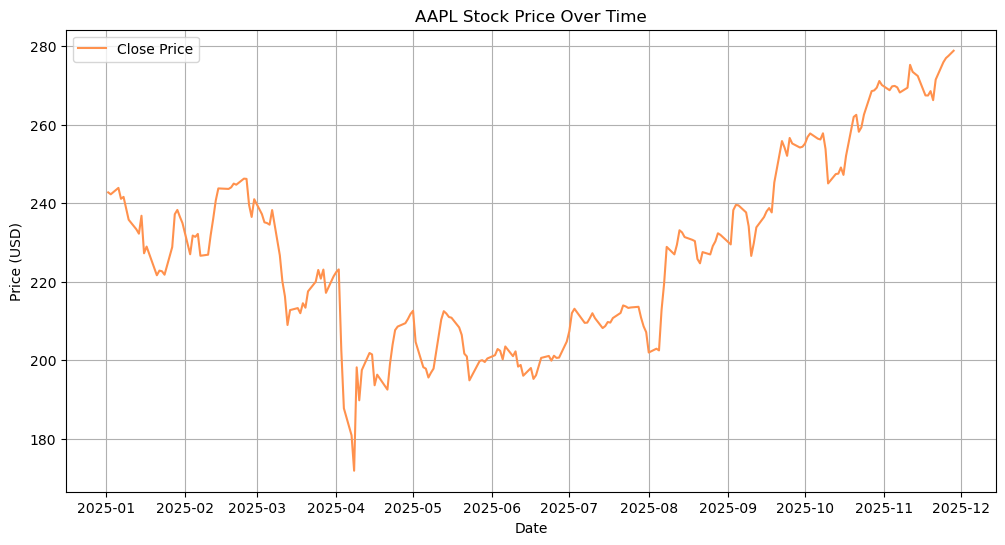

In [2]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = '#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Classical Time Series Decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_additive = seasonal_decompose(
    stock_data['Close'],
    model='additive',
    period=30
)


In [5]:
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

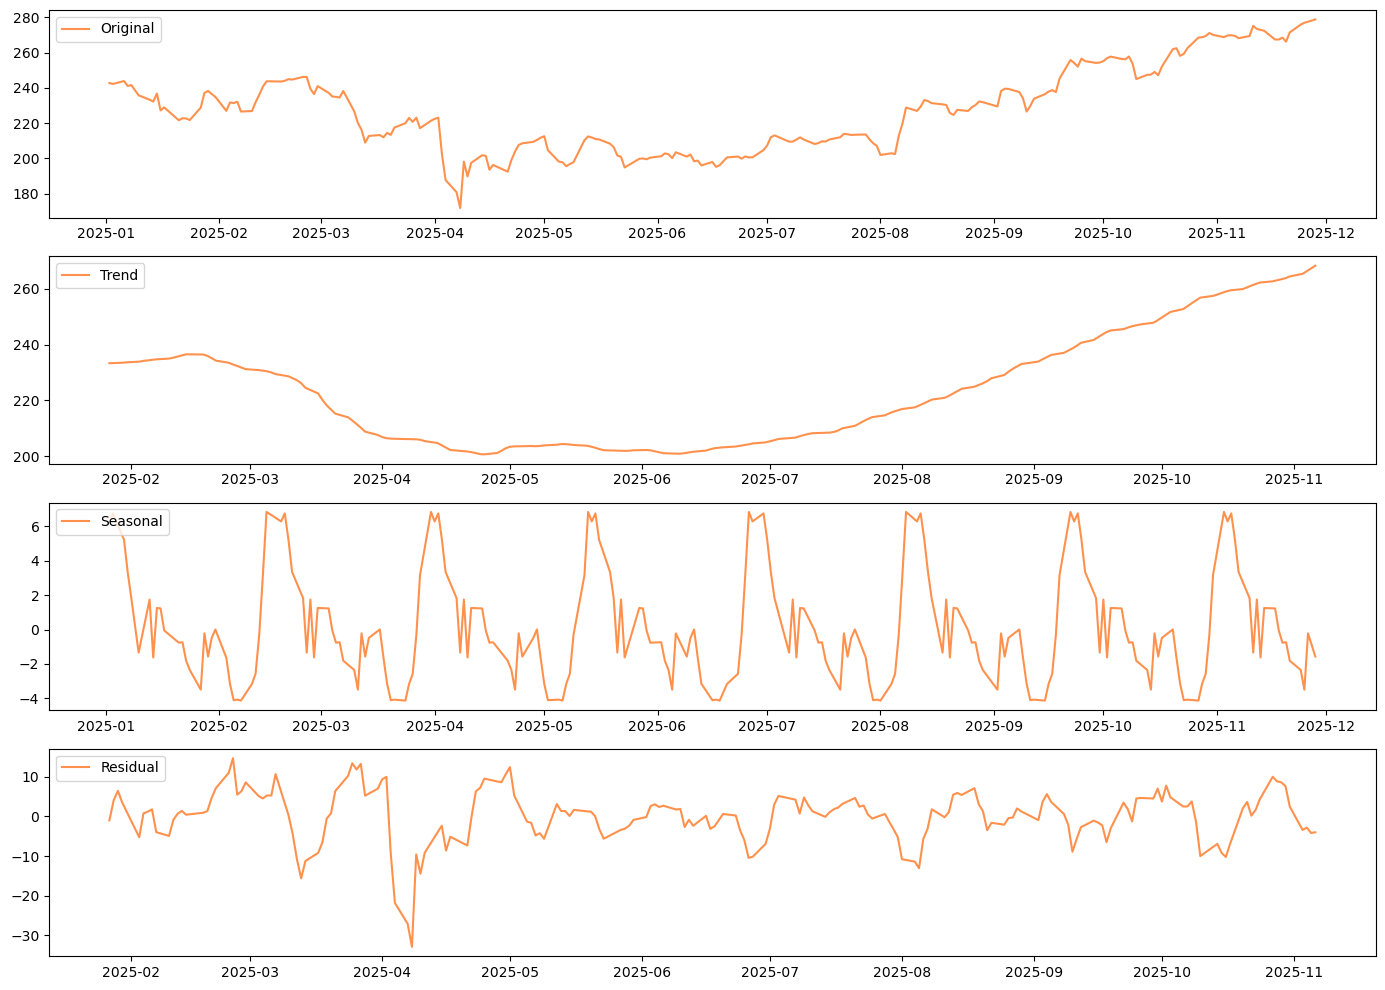

In [6]:
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='#FF914D')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## STL Decomposition

In [8]:
from statsmodels.tsa.seasonal import STL

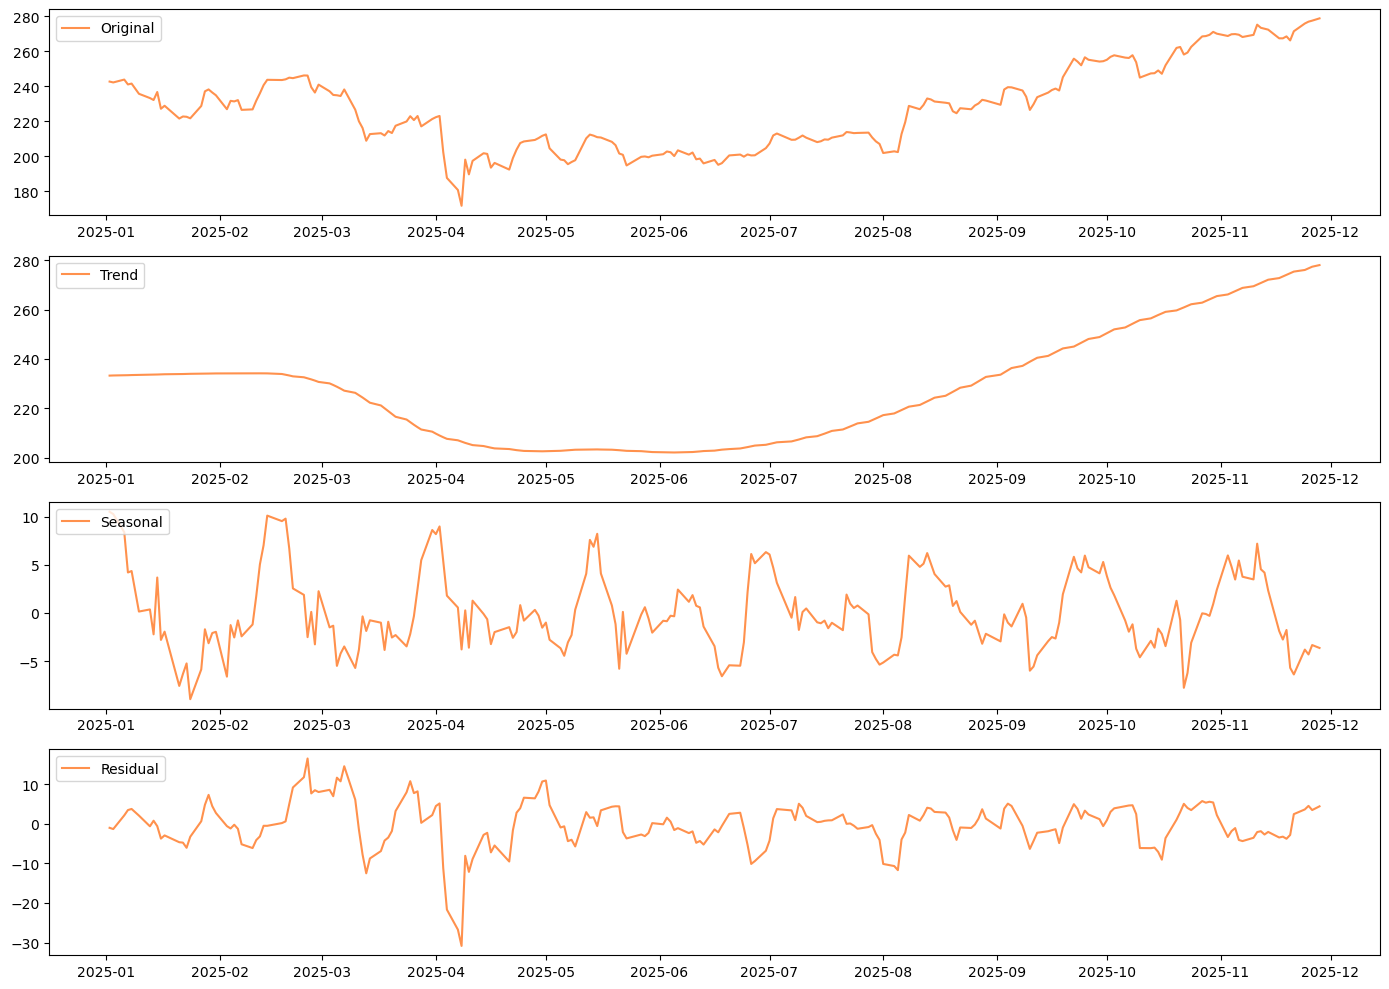

In [9]:
# Perform STL decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

#Plot the decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Stationarity Test

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
#perform the augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistics: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[0],3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {round(value,3)}')

ADF Test Results:
ADF Statistics: -0.611
p-value: -0.611
Critical Values:
   1%: -3.46
   5%: -2.875
   10%: -2.574


In [13]:
from statsmodels.tsa.stattools import kpss

#Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct')  # 'c' for constant(level stationarity), 'ct' for trend       

C:\Users\Deep\AppData\Local\Temp\ipykernel_24296\2768954682.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct')  # 'c' for constant(level stationarity), 'ct' for trend


In [14]:
print('KPSS Test Results:')
print(f'KPSS Statistics: {round(adf_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}: {value}')

KPSS Test Results:
KPSS Statistics: -0.61
p-value: 0.01
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, ks_2samp

#generating synthetic data for demonstration
np.random.seed(0)
n=500

#strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0,1,n)

#non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

#Perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

#plotting the series
plt.figure(figsize=(14,6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

## Making time series data stationary 

In [17]:
# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key,value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistics:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' %(key,value))

In [18]:
price = stock_data['Close']

In [19]:
adf_test(price)

ADF Statistics: -0.610639650788542
p-value: 0.8685597324485517
Critical Value (1%): -3.460
Critical Value (5%): -2.875
Critical Value (10%): -2.574


In [20]:
price.diff()

Ticker,AAPL
Date,
2025-01-02,NaN
2025-01-03,-0.487808
2025-01-06,1.632629
2025-01-07,-2.777435
2025-01-08,0.487778
...,...
2025-11-21,5.239990
2025-11-24,4.430023
2025-11-25,1.049988


In [21]:
price

Ticker,AAPL
Date,
2025-01-02,242.752106
2025-01-03,242.264297
2025-01-06,243.896927
2025-01-07,241.119492
2025-01-08,241.607269
...,...
2025-11-21,271.489990
2025-11-24,275.920013
2025-11-25,276.970001


In [22]:
import numpy as np
from scipy import stats

In [23]:
#log transformation
prices_log = np.log(price)

In [24]:
#square root transformation
price_sqrt = np.sqrt(price)

In [25]:
# Box-Cox transformation
#Note: Box-Cox requires all positive values
import numpy as np
from scipy import stats

prices_boxcox, lam = stats.boxcox(price[price > 0].values.ravel())

In [26]:
import numpy as np
from scipy import signal

# If 'price' is a DataFrame column, select it explicitly
price_series = price.squeeze()   # converts (n,1) DataFrame to Series
# or: price_series = price['column_name']
# or: price_series = price.iloc[:,0]

# Fit linear trend
trend = np.polyfit(np.arange(len(price_series)), price_series, 1)
trendline = np.polyval(trend, np.arange(len(price_series)))

# Detrend
price_detrended = price_series - trendline

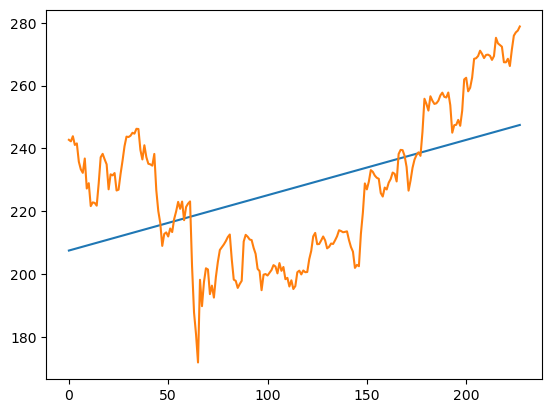

In [27]:
plt.plot(np.arange(len(price)), trendline)
plt.plot(np.arange(len(price)), price)
plt.show()

In [28]:
adf_test(price_detrended)

ADF Statistics: -2.090643688197956
p-value: 0.24829342688116046
Critical Value (1%): -3.460
Critical Value (5%): -2.874
Critical Value (10%): -2.574


In [29]:
# Using a moving average to remove trend
window = 12   #example window size
price_ma = price.rolling(window=window).mean()
price_detrended = price - price_ma
price_detrended = price_detrended.dropna()

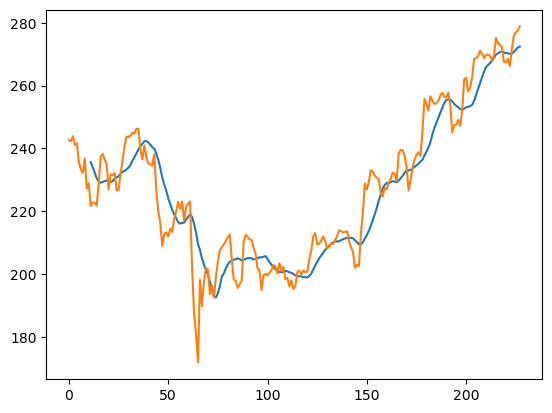

In [30]:
plt.plot(np.arange(len(price)), price_ma)
plt.plot(np.arange(len(price)), price)
plt.show()

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

#seasonal decomposition using moving averages
decomposition = seasonal_decompose(price, model='additive', period=30)
price_adjusted = price / decomposition.seasonal
price_adjusted = price_adjusted.dropna()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# seasonal decomposition using moving averages
decomposition = seasonal_decompose(price.squeeze(), model='additive', period=30)

# remove seasonality
price_adjusted = price.squeeze() / decomposition.seasonal
price_adjusted = price_adjusted.dropna()

# ensure 1D before ADF test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

adf_test(price_adjusted.values.ravel())   # flatten to 1D
# or: adf_test(price_adjusted.squeeze())


ADF Statistics: -15.507879719064748
p-value: 2.369394082431048e-28
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}


In [33]:
adf_test(price_adjusted)

ADF Statistics: -15.507879719064748
p-value: 2.369394082431048e-28
Critical Values: {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}


## White Noise | Random Walk | Ljung Box Test | Time Series Analysis

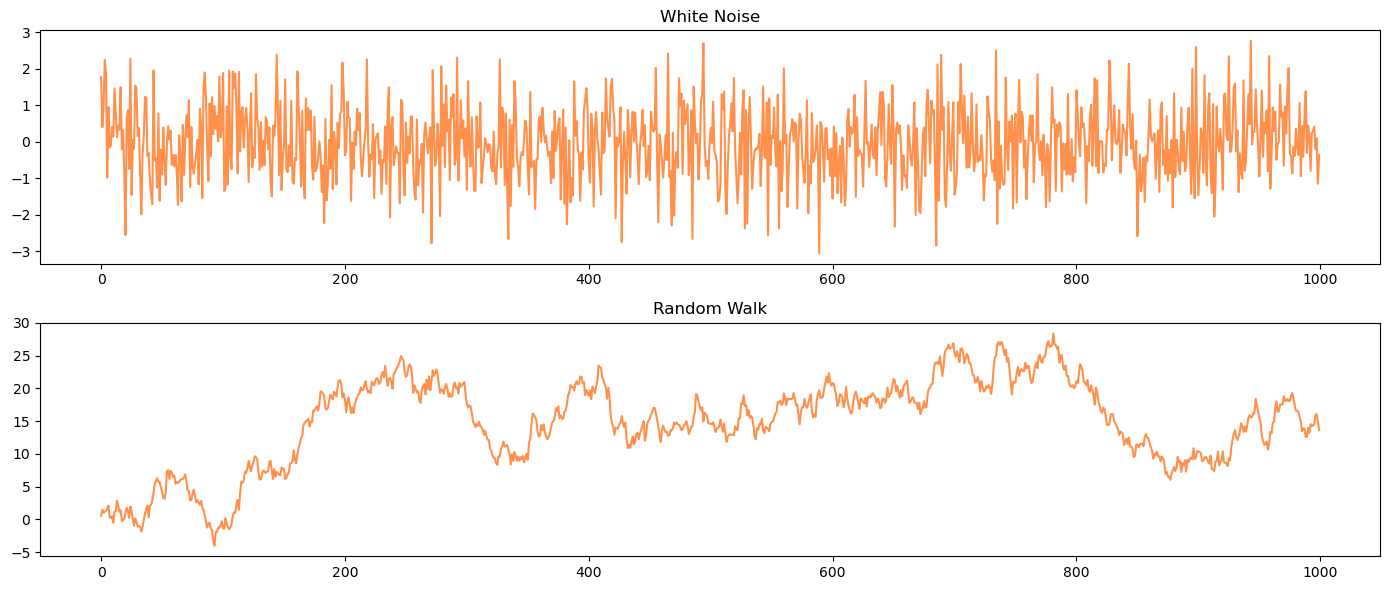


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

#Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

#White Noise 
white_noise = np.random.normal(0, 1, n)

#Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

#Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise, color='#FF914D')
plt.title('White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk, color='#FF914D')
plt.title('Random Walk')

plt.tight_layout()
plt.show()

#Ljung-Box test
print("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

print("\nLjung-Box Test for Random Walk:")
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)

## Time Seires Forecasting Models

## AR Model

In [38]:
# making data stationary before model fitting
stock_data = yf.download('AAPL', start='2023-01-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

#split the data into training and testing datasets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


In [39]:
len(train_data)

699

In [40]:
len(train_data) + len(test_data)-1

728

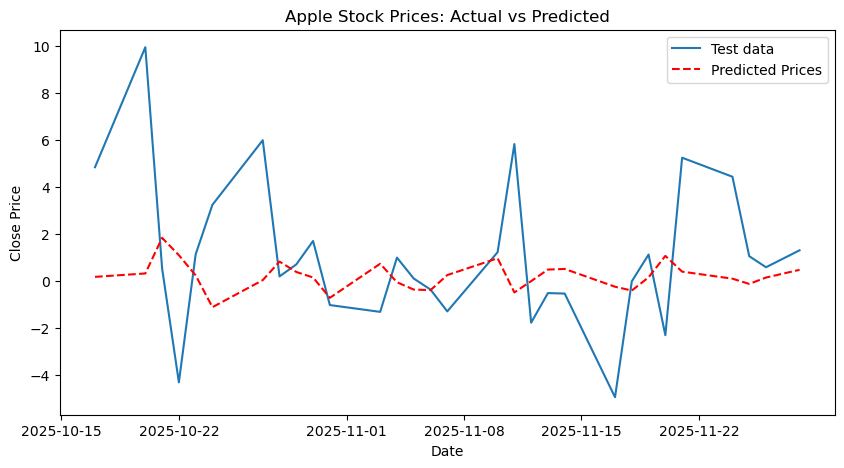

RMSE: 3.35


In [41]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

## MA Model

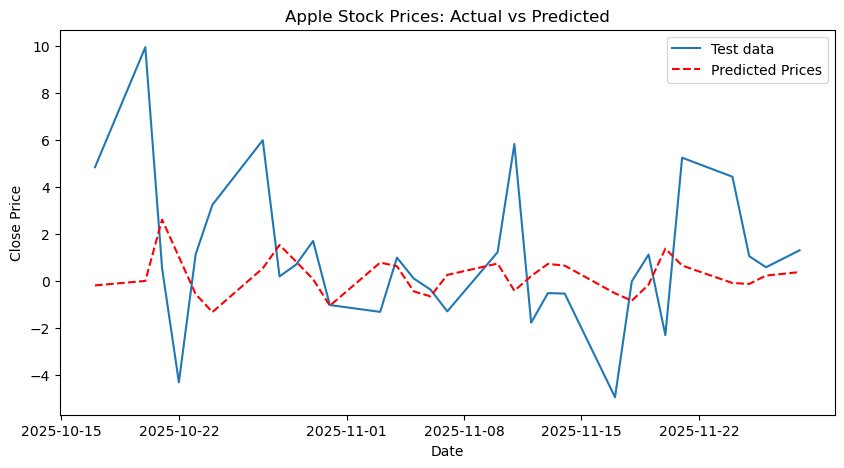

RMSE: 3.4


In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average model (MA) to the training data
model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

## ARMA Model

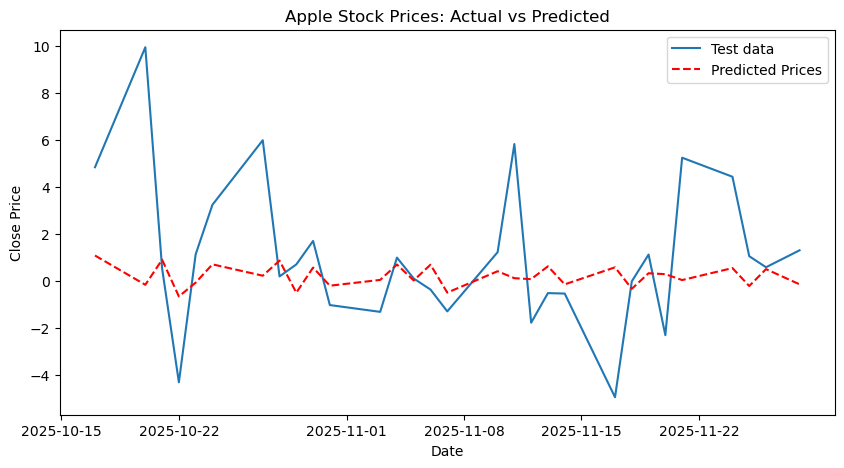

RMSE: 3.16


In [45]:
# Fit the Moving Average model (MA) to the training data
model = ARIMA(train_data, order=(7, 0, 7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

## ARIMA Model

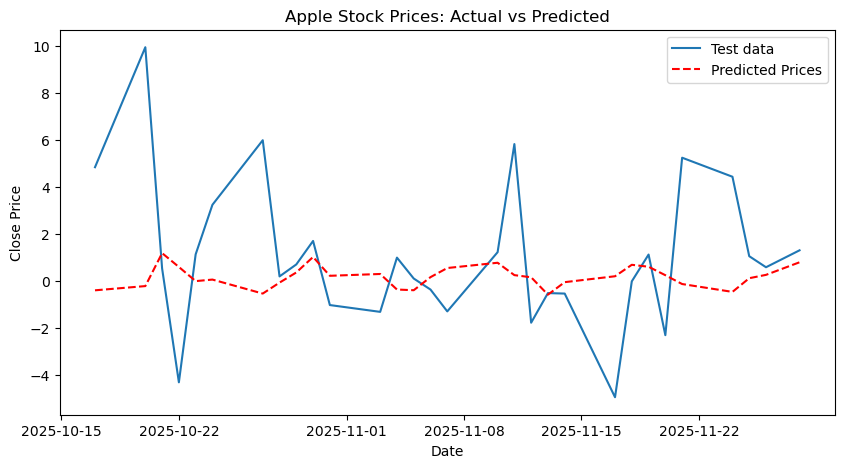

RMSE: 3.38


In [47]:
# Fit the Moving Average model (MA) to the training data
model = ARIMA(train_data, order=(7, 1, 7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

## SARIMA Model

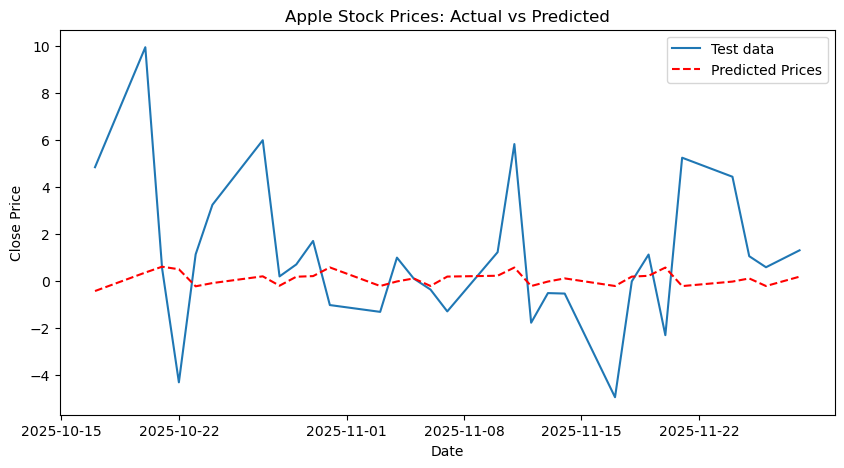

RMSE: 3.24


In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7

# Fit the SARIMA Model
model = SARIMAX(train_data,
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)

# Smoothing Methods

## Moving Average

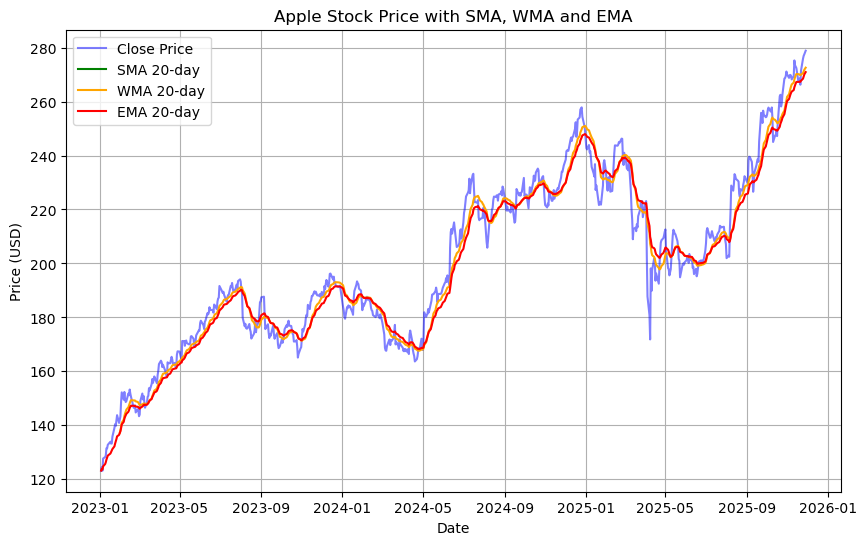

In [93]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

#calculate Weighted Moving Average(WHA)
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

#Calculate Exponential Moving Average(EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

#plotting
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {window_size}-day', color='green')
plt.plot(stock_data['WMA'], label=f'WMA {window_size}-day', color='orange')
plt.plot(stock_data['EMA'], label=f'EMA {window_size}-day', color='red')

plt.title('Apple Stock Price with SMA, WMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

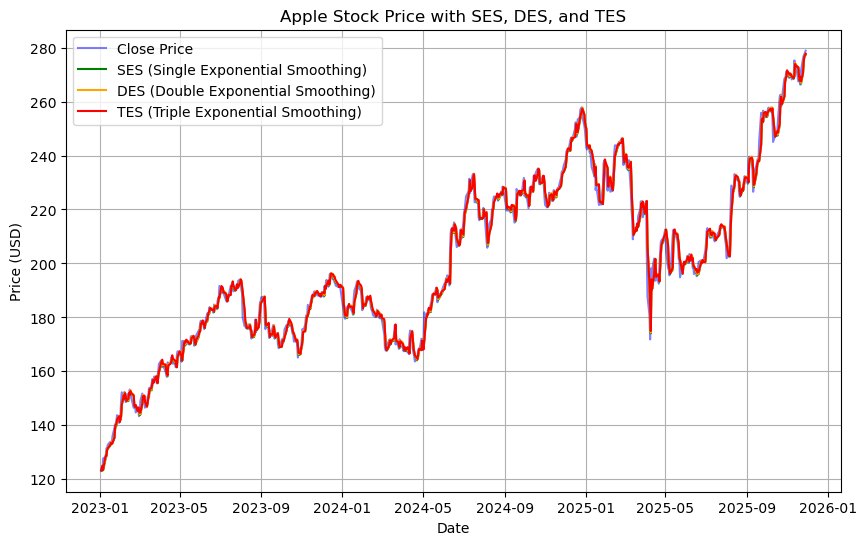

In [105]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt

# Close prices
close_prices = stock_data['Close']

# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.8)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) – Holt’s Linear Trend
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.8)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) – Holt-Winters Method
tes_model = ExponentialSmoothing(close_prices,
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12).fit(smoothing_level=0.8)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(stock_data['DES'], label='DES (Double Exponential Smoothing)', color='orange')
plt.plot(stock_data['TES'], label='TES (Triple Exponential Smoothing)', color='red')

plt.title('Apple Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


## ACF and PACF PLot

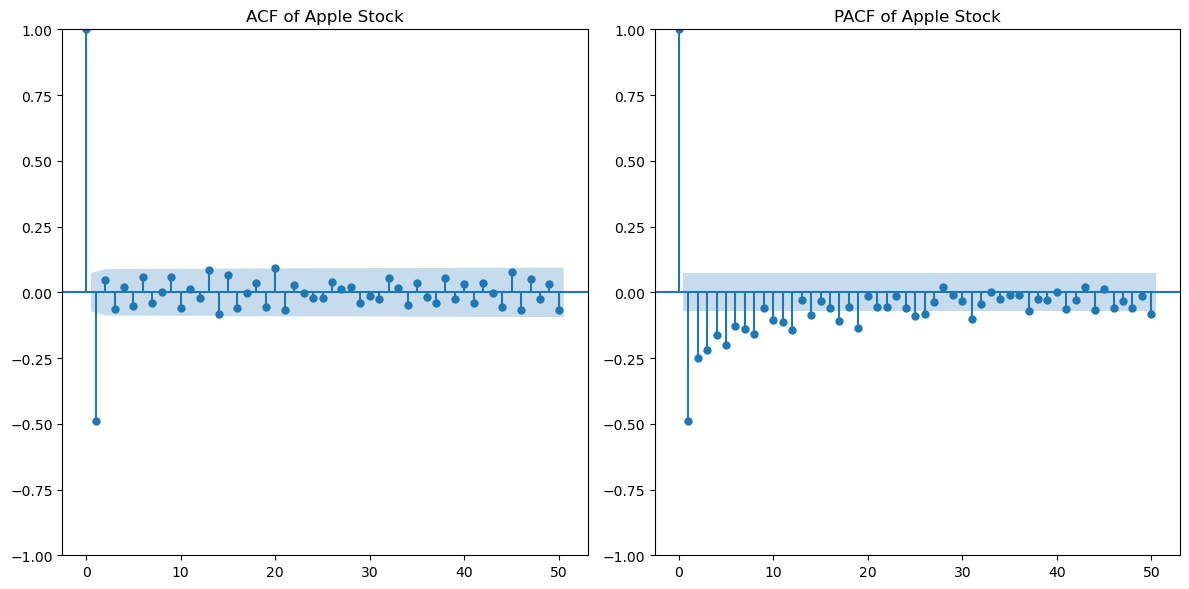

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))

#ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Apple Stock')

#PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()

## Model Evaluation Metrics

In [111]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

#Fit the Autoregressive model(AR) to the training data 
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

#Make Predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 4. Mean Absolute Percentage Error (MAPE)
# Use numpy arrays to avoid pandas alignment issues
mape = np.mean(np.abs((np.array(test_data) - np.array(predictions)) / np.array(test_data))) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# 5. AIC & BIC
aic = model_fit.aic
bic = model_fit.bic

print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Mean Absolute Error (MAE): 2.386839312434077
Mean Squared Error (MSE): 11.19191730795499
Root Mean Squared Error (RMSE): 3.3454323050922716
Mean Absolute Percentage Error (MAPE): 197.025002768542%
Akaike Information Criterion (AIC): 3516.1257839105588
Bayesian Information Criterion (BIC): 3660.3108738346623


# Data Preprocessing

### Handling Missing values

In [122]:
import pandas as pd

In [124]:
# Sample data with missing dates
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07',
             '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-12'],
    'Price': [100, 101, 103, 106, 107, 108, 109, 111]
}

# Create a DataFrame
data = pd.DataFrame(data)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set index as Date
data.set_index('Date', inplace=True)

In [126]:
data

,Price
Date,
2024-01-01,100
2024-01-02,101
2024-01-04,103
2024-01-07,106
2024-01-08,107
2024-01-09,108
2024-01-10,109
2024-01-12,111


In [128]:
# Create a complete date range
complete_index = pd.date_range(start='2024-01-01', end='2024-01-12', freq='D')

# Reindex the DataFrame to include missing dates
data = data.reindex(complete_index)

print("Reindexed DataFrame with Missing Dates:\n", data)


Reindexed DataFrame with Missing Dates:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0


# 1. Imputation

In [133]:
# Mean Imputation
mean_value = data.mean()
data_mean_imputed = data.fillna(mean_value)

# Median Imputation
median_value = data.median()
data_median_imputed = data.fillna(median_value)

# Mode Imputation
mode_value = data.mode()
data_mode_imputed = data.fillna(mode_value.values[0][0])

# Forward Fill
data_ffill = data.ffill()

# Backwards Fill
data_bfill = data.bfill()

# Print Outputs
print("Original Data:\n", data)

# Mean Imputation
print("-----------\nMean:", mean_value.values[0])
print("\nMean Imputation:\n", data_mean_imputed)

# Median Imputation
print("-----------\nMedian:", median_value.values[0])
print("\nMedian Imputation:\n", data_median_imputed)

# Mode Imputation
print("-----------\nMode:", mode_value.values[0][0])
print("\nMode Imputation:\n", data_mode_imputed)

# Forward Fill
print("-----------\nForward Fill:\n", data_ffill)

# Backward Fill
print("-----------\nBackward Fill:\n", data_bfill)


Original Data:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0
-----------
Mean: 105.625

Mean Imputation:
               Price
2024-01-01  100.000
2024-01-02  101.000
2024-01-03  105.625
2024-01-04  103.000
2024-01-05  105.625
2024-01-06  105.625
2024-01-07  106.000
2024-01-08  107.000
2024-01-09  108.000
2024-01-10  109.000
2024-01-11  105.625
2024-01-12  111.000
-----------
Median: 106.5

Median Imputation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  106.5
2024-01-04  103.0
2024-01-05  106.5
2024-01-06  106.5
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  106.5
2024-01-12  111.0
-----------
Mode: 100.0

Mode Imputation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  100.0
2024-01-04  103.0
2024-01-05  100.0
2024-01-06  1

In [135]:
# 1. Linear Interpolation
data_linear_interp = data.interpolate(method='linear')

# 2. Polynomial Interpolation (degree 2)
data_poly_interp = data.interpolate(method='polynomial', order=2)

# 3. Spline Interpolation (order 2)
data_spline_interp = data.interpolate(method='spline', order=2)

print("\nLinear Interpolation:\n", data_linear_interp)
print("\nPolynomial Interpolation (degree 2):\n", data_poly_interp)
print("\nSpline Interpolation (order 2):\n", data_spline_interp)


Linear Interpolation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Polynomial Interpolation (degree 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Spline Interpolation (order 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0


In [137]:
data['Sales'] = [700, 900, 1000, 2000, 1500, 3000, 2300, 4000, 5900, 6000, 6500, 7000]
data

,Price,Sales
2024-01-01,100.0,700
2024-01-02,101.0,900
2024-01-03,NaN,1000
2024-01-04,103.0,2000
2024-01-05,NaN,1500
2024-01-06,NaN,3000
2024-01-07,106.0,2300
2024-01-08,107.0,4000
2024-01-09,108.0,5900
2024-01-10,109.0,6000


In [139]:
from sklearn.linear_model import LinearRegression

# Separate rows with known and missing Price values
known_data = data.dropna(subset=['Price'])
missing_data = data[data['Price'].isna()]

# Train a model on known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price'])

# Predict missing values
predicted_values = model.predict(missing_data[['Sales']])
data.loc[data['Price'].isna(), 'Price'] = predicted_values

print("\nData with Predicted Values:\n", data)


Data with Predicted Values:
                  Price  Sales
2024-01-01  100.000000    700
2024-01-02  101.000000    900
2024-01-03  101.675094   1000
2024-01-04  103.000000   2000
2024-01-05  102.434691   1500
2024-01-06  104.713483   3000
2024-01-07  106.000000   2300
2024-01-08  107.000000   4000
2024-01-09  108.000000   5900
2024-01-10  109.000000   6000
2024-01-11  110.030665   6500
2024-01-12  111.000000   7000


# Downsampling to Monthly Frequency

In [141]:
monthly_data = stock_data['Close'].resample('M').mean()

print("\nMonthly Downsampled Data:\n", monthly_data)


Monthly Downsampled Data:
 Ticker            AAPL
Date                  
2023-01-31  133.761049
2023-02-28  148.867893
2023-03-31  152.894785
2023-04-30  162.841124
2023-05-31  170.457058
2023-06-30  182.073191
2023-07-31  190.103880
2023-08-31  179.068115
2023-09-30  175.115835
2023-10-31  172.806850
2023-11-30  184.062648
2023-12-31  192.490630
2024-01-31  185.968013
2024-02-29  183.209130
2024-03-31  171.299127
2024-04-30  168.232188
2024-05-31  184.952325
2024-06-30  204.871686
2024-07-31  223.083470
2024-08-31  220.319720
2024-09-30  222.505753
2024-10-31  228.768594
2024-11-30  226.723617
2024-12-31  248.200306
2025-01-31  233.530795
2025-02-28  237.634375
2025-03-31  221.943920
2025-04-30  200.498205
2025-05-31  203.431013
2025-06-30  200.235424
2025-07-31  210.837013
2025-08-31  224.361019
2025-09-30  242.251352
2025-10-31  258.045067
2025-11-30  271.587632


## Upsampling

In [145]:
hourly_data = stock_data['Close'].resample('H').interpolate(method='linear')
print("\nHourly Upsampled Data:\n", hourly_data)


Hourly Upsampled Data:
 Ticker                     AAPL
Date                           
2023-01-03 00:00:00  123.211197
2023-01-03 01:00:00  123.264149
2023-01-03 02:00:00  123.317101
2023-01-03 03:00:00  123.370052
2023-01-03 04:00:00  123.423004
...                         ...
2025-11-27 20:00:00  278.741671
2025-11-27 21:00:00  278.768755
2025-11-27 22:00:00  278.795839
2025-11-27 23:00:00  278.822922
2025-11-28 00:00:00  278.850006

[25441 rows x 1 columns]
